# 10wk-1: 야후 finance, 출산율 자료 시각화

최규빈  
2023-11-06

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/10wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wzm7J2fgIWLsHekZIq3QKN&si=sLbYvVqBm93A7lbV>

# 2. Imports

In [1]:
# !pip install yfinance
import numpy as np 
import pandas as pd 
import yfinance as yf

# 3. `yfinance`를 이용한 주식자료 시각화

## A. 크롤링 + 데이터정리

`-` yahoo finance: https://finance.yahoo.com/

**Apple: `'AAPL'`**

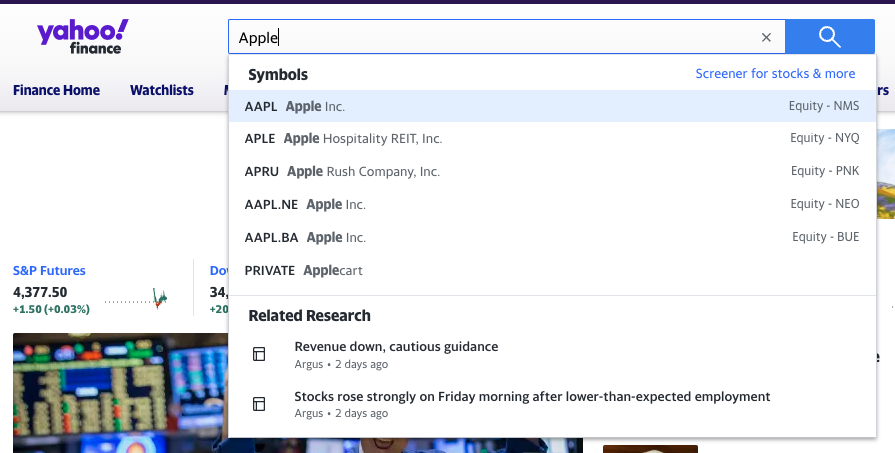

**삼성전자: `'005930.KS'`**

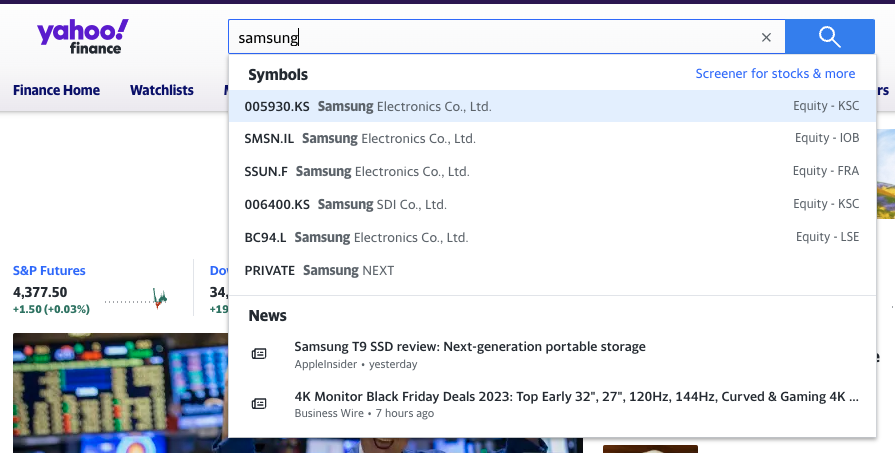

`-` 크롤링을 위한 코드

In [2]:
symbols = ['AMZN','AAPL','GOOG','MSFT','NFLX','NVDA','TSLA']
start = '2020-01-01'
end = '2023-11-06'
df = yf.download(symbols,start,end)
df

[                       0%%                      ][**************        29%%                      ]  2 of 7 completed[********************* 43%%                      ]  3 of 7 completed[**********************57%%*                     ]  4 of 7 completed[**********************71%%********              ]  5 of 7 completed[**********************86%%***************       ]  6 of 7 completed[*********************100%%**********************]  7 of 7 completed

`-` 데이터를 살펴보자.

In [3]:
df.stack()

> **ChatGPT**
>
> “Adj Close”는 “Adjusted Closing Price”를 의미합니다. 주식 시장에서 각
> 거래일의 마감 가격을 조정하여 나타낸 값입니다. “조정”이라는 용어는
> 주식 분할, 배당금 지급, 자본 변동과 같은 기업 활동을 반영하여 가격을
> 수정한 것을 의미합니다. 이는 투자자들이 시간이 지나면서 주식의 실제
> 성과를 더 정확히 비교할 수 있게 해줍니다.
>
> “Close”는 해당 거래일에 주식 시장이 닫힐 때의 주식 가격입니다.
>
> 다른 열은 다음을 의미합니다:
>
> -   “High”는 해당 거래일에 주식이 거래된 최고 가격입니다.
> -   “Low”는 해당 거래일에 주식이 거래된 최저 가격입니다.
> -   “Open”은 주식 시장이 개장했을 때의 주식 가격입니다.
> -   “Volume”은 그 날에 거래된 주식의 총 수량입니다.
>
> 표는 다양한 날짜에 대한 여러 주요 기술 회사들(예: AAPL - Apple Inc.,
> AMZN - Amazon.com Inc., GOOG - Alphabet Inc., MSFT - Microsoft
> Corporation, NFLX - Netflix Inc., NVDA - NVIDIA Corporation, TSLA -
> Tesla Inc.)의 주식 정보를 보여줍니다.

`-` `Adj Close`만을 선택

In [4]:
df.stack().loc[:,'Adj Close']

`-` `Adj Close`만을 선택 – 또 다른 방법 (일단 이거로 할게요)

In [5]:
df.loc[:,'Adj Close']

## B. 시각화

`-` tidydata를 생성

In [6]:
df.loc[:,'Adj Close'].stack().reset_index()\
.set_axis(['Date','Company','Price'],axis=1)

`-` 바로 이어서 시각화! – `x='Date', y='Price', color='Company'`

In [7]:
df.loc[:,'Adj Close'].stack().reset_index()\
.set_axis(['Date','Company','Price'],axis=1)\
.plot.line(x='Date',y='Price',color='Company',backend='plotly')

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


# 4. 출산율 시각화

## A. 크롤링 + 데이터정리

`-` 대한민국의 저출산문제

ref: <https://ko.wikipedia.org/wiki/대한민국의_저출산>

`-` 위의 url에서 5번째 테이블을 읽고싶다.

-   5번째 테이블: 시도별 출생아 수

In [8]:
df_lst = pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A0%80%EC%B6%9C%EC%82%B0')
df = df_lst[4]
df

`-` `'-'`로 표현된 값을 0으로 처리하는게 좋겠음

In [9]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).reset_index()

/tmp/ipykernel_3694199/1737303492.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


## B. 시각화1: 전국 출생아수 시각화

`-` 전국으로 집계가 되어있던 정보를 남겨도 좋지만, `groupy+agg` 조합으로
새롭게 계산해보자.

In [10]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).drop('전국')\
.stack().reset_index().rename({'level_1':'년도',0:'출생아수'},axis=1)\
.groupby('년도').agg({'출생아수':'sum'}).reset_index()\
.plot.line(x='년도',y='출생아수',backend='plotly')

/tmp/ipykernel_3694199/1805618332.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


## C. 시각화2: 시도별 출생아수 시각화 (line)

In [11]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).drop('전국')\
.stack().reset_index().rename({'level_1':'년도',0:'출생아수'},axis=1)\
.plot.line(x='년도',y='출생아수',color='지역',backend='plotly')

/tmp/ipykernel_3694199/277281482.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


## D. 시각화3: 시도별 출생아수 시각화 (area)

`-` 시각화1,시각화2의 정보가 적절히 혼합되어있는 시각화는 없을까?

In [12]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).drop('전국')\
.stack().reset_index().rename({'level_1':'년도',0:'출생아수'},axis=1)\
.plot.area(x='년도',y='출생아수',color='지역',backend='plotly')

/tmp/ipykernel_3694199/70633050.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


-   기묘하다..

`-` 해석: 2014년 경기, 2016년 서울, 2019년 경기에 애를 낳지 않는다.

`-` 데이터와 비교

In [13]:
df

## E. 시각화1,2,3 수정

`-` 시각화1의 수정

In [14]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).drop('전국')\
.applymap(lambda x: x*1000 if x<1000 else x)\
.stack().reset_index().rename({'level_1':'년도',0:'출생아수'},axis=1)\
.groupby('년도').agg({'출생아수':'sum'}).reset_index()\
.plot.line(x='년도',y='출생아수',backend='plotly')

/tmp/ipykernel_3694199/1274971694.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3694199/1274971694.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


`-` 시각화2의 수정

In [15]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).drop('전국')\
.applymap(lambda x: x*1000 if x<1000 else x)\
.stack().reset_index().rename({'level_1':'년도',0:'출생아수'},axis=1)\
.plot.line(x='년도',y='출생아수',color='지역',backend='plotly')

/tmp/ipykernel_3694199/1526382732.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3694199/1526382732.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


`-` 시각화3의 수정

In [16]:
df.rename({'지역/연도[6]':'지역'},axis=1)\
.set_index(['지역'])\
.applymap(lambda x: 0 if '-' in str(x) else float(x)).drop('전국')\
.applymap(lambda x: x*1000 if x<1000 else x)\
.stack().reset_index().rename({'level_1':'년도',0:'출생아수'},axis=1)\
.plot.area(x='년도',y='출생아수',color='지역',backend='plotly')

/tmp/ipykernel_3694199/3339566067.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/tmp/ipykernel_3694199/3339566067.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


# 5. HW

삼성전자와 카카오에 대한 주가(`'Adj Close'` 기준)를 아래와 같이 시각화
하라.

-   start = ‘2020-01-01’
-   end = ‘2023-11-06’

**시각화예시**

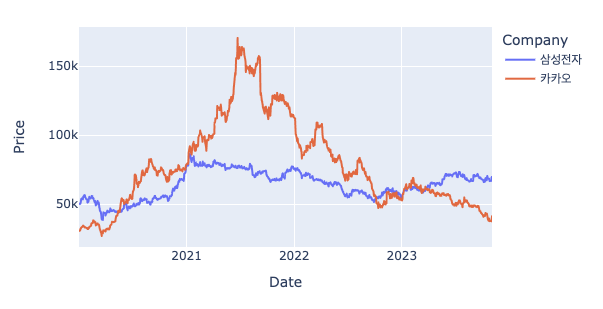